# From Wavefront to PSF to MTF

## In this notebook I will show how to construct a wavefront using the Zernike Polynomials which describe different optical aberrations. Then I will show how to construct a point spread function (PSF) and eventually the Modulation transfer function (MTF).

In [1]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

## Zernike Polynomials can be written in cartesian or polar coordinates

In [44]:
## polar coordinates
def Zernike_polar(coefficients, r, u):
 Z = coefficients
 Z1  =  Z[0]  * 1*(np.cos(u)**2+np.sin(u)**2)
 Z2  =  Z[1]  * 2*r*np.cos(u)
 Z3  =  Z[2]  * 2*r*np.sin(u)
 Z4  =  Z[3]  * np.sqrt(3)*(2*r**2-1)
 Z5  =  Z[4]  * np.sqrt(6)*r**2*np.sin(2*u)
 Z6  =  Z[5]  * np.sqrt(6)*r**2*np.cos(2*u)
 Z7  =  Z[6]  * np.sqrt(8)*(3*r**2-2)*r*np.sin(u)
 Z8  =  Z[7]  * np.sqrt(8)*(3*r**2-2)*r*np.cos(u)
 '''
 Z9  =  Z[9]  * np.sqrt(8)*r**3*np.sin(3*u)
 Z10 =  Z[10] * np.sqrt(8)*r**3*np.cos(3*u)
 Z11 =  Z[11] * np.sqrt(5)*(1-6*r**2+6*r**4)
 Z12 =  Z[12] * np.sqrt(10)*(4*r**2-3)*r**2*np.cos(2*u)
 Z13 =  Z[13] * np.sqrt(10)*(4*r**2-3)*r**2*np.sin(2*u)
 Z14 =  Z[14] * np.sqrt(10)*r**4*np.cos(4*u)
 Z15 =  Z[15] * np.sqrt(10)*r**4*np.sin(4*u)
 Z16 =  Z[16] * np.sqrt(12)*(10*r**4-12*r**2+3)*r*np.cos(u)
 Z17 =  Z[17] * np.sqrt(12)*(10*r**4-12*r**2+3)*r*np.sin(u)
 Z18 =  Z[18] * np.sqrt(12)*(5*r**2-4)*r**3*np.cos(3*u)
 Z19 =  Z[19] * np.sqrt(12)*(5*r**2-4)*r**3*np.sin(3*u)
 Z20 =  Z[20] * np.sqrt(12)*r**5*np.cos(5*u)
 Z21 =  Z[21] * np.sqrt(12)*r**5*np.sin(5*u)
 Z22 =  Z[22] * np.sqrt(7)*(20*r**6-30*r**4+12*r**2-1)
 Z23 =  Z[23] * np.sqrt(14)*(15*r**4-20*r**2+6)*r**2*np.sin(2*u)
 Z24 =  Z[24] * np.sqrt(14)*(15*r**4-20*r**2+6)*r**2*np.cos(2*u)
 Z25 =  Z[25] * np.sqrt(14)*(6*r**2-5)*r**4*np.sin(4*u)
 Z26 =  Z[26] * np.sqrt(14)*(6*r**2-5)*r**4*np.cos(4*u)
 Z27 =  Z[27] * np.sqrt(14)*r**6*np.sin(6*u)
 Z28 =  Z[28] * np.sqrt(14)*r**6*np.cos(6*u)
 Z29 =  Z[29] * 4*(35*r**6-60*r**4+30*r**2-4)*r*np.sin(u)
 Z30 =  Z[30] * 4*(35*r**6-60*r**4+30*r**2-4)*r*np.cos(u)
 Z31 =  Z[31] * 4*(21*r**4-30*r**2+10)*r**3*np.sin(3*u)
 Z32 =  Z[32] * 4*(21*r**4-30*r**2+10)*r**3*np.cos(3*u)
 Z33 =  Z[33] * 4*(7*r**2-6)*r**5*np.sin(5*u)
 Z34 =  Z[34] * 4*(7*r**2-6)*r**5*np.cos(5*u)
 Z35 =  Z[35] * 4*r**7*np.sin(7*u)
 Z36 =  Z[36] * 4*r**7*np.cos(7*u)
 Z37 =  Z[37] * 3*(70*r**8-140*r**6+90*r**4-20*r**2+1)
 '''
 ZW = Z1 + Z2 +  Z3+  Z4+  Z5+  Z6+  Z7+  Z8#+  Z9+ Z10+ Z11+ Z12+ Z13+ Z14+ Z15+ Z16+ Z17+ Z18+ Z19+Z20+ Z21+ Z22+ Z23+ Z24+ Z25+ Z26+ Z27+ Z28+ Z29+Z30+ Z31+ Z32+ Z33+ Z34+ Z35+ Z36+ Z37
 return ZW
 

In [40]:
## Cartesian coordinates
def Zernike_cartesien(coefficients, x,y):
 Z = [0]+coefficients
 r = np.sqrt(x**2 + y**2)
 Z1  =  Z[1]  * 1
 Z2  =  Z[2]  * 2*x
 Z3  =  Z[3]  * 2*y

 Z4  =  Z[4]  * np.sqrt(3)*(2*r**2-1)
 Z5  =  Z[5]  * 2*np.sqrt(6)*x*y
 Z6  =  Z[6]  * np.sqrt(6)*(x**2-y**2)
 Z7  =  Z[7]  * np.sqrt(8)*y*(3*r**2-2)
 Z8  =  Z[8]  * np.sqrt(8)*x*(3*r**2-2)
 Z9  =  Z[9]  * np.sqrt(8)*y*(3*x**2-y**2)
 Z10 =  Z[10] * np.sqrt(8)*x*(x**2-3*y**2)
 Z11 =  Z[11] * np.sqrt(5)*(6*r**4-6*r**2+1)
 Z12 =  Z[12] * np.sqrt(10)*(x**2-y**2)*(4*r**2-3)
 Z13 =  Z[13] * 2*np.sqrt(10)*x*y*(4*r**2-3)
 Z14 =  Z[14] * np.sqrt(10)*(r**4-8*x**2*y**2)
 Z15 =  Z[15] * 4*np.sqrt(10)*x*y*(x**2-y**2)
 Z16 =  Z[16] * np.sqrt(12)*x*(10*r**4-12*r**2+3)
 Z17 =  Z[17] * np.sqrt(12)*y*(10*r**4-12*r**2+3)
 Z18 =  Z[18] * np.sqrt(12)*x*(x**2-3*y**2)*(5*r**2-4)
 Z19 =  Z[19] * np.sqrt(12)*y*(3*x**2-y**2)*(5*r**2-4)
 Z20 =  Z[20] * np.sqrt(12)*x*(16*x**4-20*x**2*r**2+5*r**4)
 Z21 =  Z[21] * np.sqrt(12)*y*(16*y**4-20*y**2*r**2+5*r**4)
 Z22 =  Z[22] * np.sqrt(7)*(20*r**6-30*r**4+12*r**2-1)
 Z23 =  Z[23] * 2*np.sqrt(14)*x*y*(15*r**4-20*r**2+6)
 Z24 =  Z[24] * np.sqrt(14)*(x**2-y**2)*(15*r**4-20*r**2+6)
 Z25 =  Z[25] * 4*np.sqrt(14)*x*y*(x**2-y**2)*(6*r**2-5)
 Z26 =  Z[26] * np.sqrt(14)*(8*x**4-8*x**2*r**2+r**4)*(6*r**2-5)
 Z27 =  Z[27] * np.sqrt(14)*x*y*(32*x**4-32*x**2*r**2+6*r**4)
 Z28 =  Z[28] * np.sqrt(14)*(32*x**6-48*x**4*r**2+18*x**2*r**4-r**6)
 Z29 =  Z[29] * 4*y*(35*r**6-60*r**4+30*r**2-4)
 Z30 =  Z[30] * 4*x*(35*r**6-60*r**4+30*r**2-4)
 Z31 =  Z[31] * 4*y*(3*x**2-y**2)*(21*r**4-30*r**2+10)
 Z32 =  Z[32] * 4*x*(x**2-3*y**2)*(21*r**4-30*r**2+10)
 Z33 =  Z[33] * 4*(7*r**2-6)*(4*x**2*y*(x**2-y**2)+y*(r**4-8*x**2*y**2))
 Z34 =  Z[34] * (4*(7*r**2-6)*(x*(r**4-8*x**2*y**2)-4*x*y**2*(x**2-y**2)))
 Z35 =  Z[35] * (8*x**2*y*(3*r**4-16*x**2*y**2)+4*y*(x**2-y**2)*(r**4-16*x**2*y**2))
 Z36 =  Z[36] * (4*x*(x**2-y**2)*(r**4-16*x**2*y**2)-8*x*y**2*(3*r**4-16*x**2*y**2))
 Z37 =  Z[37] * 3*(70*r**8-140*r**6+90*r**4-20*r**2+1)

 ZW = Z1 + Z2 +  Z3+  Z4+  Z5+  Z6+  Z7+  Z8+  Z9+ Z10+ Z11+ Z12+ Z13+ Z14+ Z15+ Z16+ Z17+ Z18+ Z19+Z20+ Z21+ Z22+ Z23+ Z24+ Z25+ Z26+ Z27+ Z28+ Z29+Z30+ Z31+ Z32+ Z33+ Z34+ Z35+ Z36+ Z37
 return ZW

### From now on we will use the polar coordinates to define our wavefront since it is computationally less expensive than the cartesian coordinates.
### We will start first with the function that defines the Exit pupil radius in pixels (where the wavefront is usually described). This radius depends on the size of the image and the resolution of our system.


In [7]:
def pupil_size(D,lam,pix,size):
    pixrad = pix*np.pi/(180*3600)  # Pixel-size in radians
    nu_cutoff = D/lam      # Cutoff frequency in rad^-1
    deltanu = 1./(size*pixrad)     # Sampling interval in rad^-1
    rpupil = nu_cutoff/(2*deltanu) #pupil size in pixels
    return np.int(rpupil)

### Next, we costruct our phase. Since we are using the Noll's expansion scheme, the outer radius is normalized to unity. And since our pupil is circular we should set everything outside unity radius to zero.

In [9]:
def phase(coefficients,rpupil):
 r = 1
 x = np.linspace(-r, r, 2*rpupil)
 y = np.linspace(-r, r, 2*rpupil)

 [X,Y] = np.meshgrid(x,y) 
 R = np.sqrt(X**2+Y**2)
 theta = np.arctan2(Y, X)
    
 Z = Zernike_polar(coefficients,R,theta)
 Z[R>1] = 0
 return Z


### Next, we should center our pupil on the image plane.  

In [11]:
def center(coefficients,size,rpupil):
    A = np.zeros([size,size])
    A[size//2-rpupil+1:size//2+rpupil+1,size//2-rpupil+1:size//2+rpupil+1]= phase(coefficients,rpupil)
    return A

### Now we construct the pupil mask to transmit only the frequencies inside the pupil.

In [12]:
def mask(rpupil, size):
 r = 1
 x = np.linspace(-r, r, 2*rpupil)
 y = np.linspace(-r, r, 2*rpupil) 

 [X,Y] = np.meshgrid(x,y) 
 R = np.sqrt(X**2+Y**2)
 theta = np.arctan2(Y, X)
 M = 1*(np.cos(theta)**2+np.sin(theta)**2)
 M[R>1] = 0
 Mask =  np.zeros([size,size])
 Mask[size//2-rpupil+1:size//2+rpupil+1,size//2-rpupil+1:size//2+rpupil+1]= M
 return Mask

### Now we construct the complex pupil function.

In [14]:
def complex_pupil(A,Mask):
    abbe =  np.exp(1j*A)
    abbe_z = np.zeros((len(abbe),len(abbe)),dtype=np.complex)
    abbe_z = Mask*abbe
    return abbe_z

### PSF construction, which the modulus square of the fourier transform of the complex pupil function

In [15]:
def PSF(complx_pupil):
    PSF = ifftshift(fft2(fftshift(complx_pupil))) 
    PSF = (np.abs(PSF))**2 #or PSF*PSF.conjugate()
    PSF = PSF/PSF.sum() #normalizing the PSF
    return PSF

### OTF construction, which is the fourier transform of the PSF

In [16]:
def OTF(psf):
    otf = ifftshift(psf) #move the central frequency to the corner
    otf = fft2(otf)
    otf_max = float(otf[0,0]) #otf_max = otf[size/2,size/2] if max is shifted to center
    otf = otf/otf_max #normalize by the central frequency signal
    return otf

### MTF construction, which is the modulus of the OTF

In [17]:
def MTF(otf):
    mtf = np.abs(otf)
    return mtf

# Now that we have written the functions, we can illustrate an example.

### Let's start by building a random wavefront aberration consisting of the first order ones (tip/tilt/defocus/astigmatism/coma) and introducing the telescope parameters

In [18]:
D = 140 #diameter of the aperture
lam = 617.3*10**(-6) #wavelength of observation
pix = 0.5 #plate scale
f = 4125.3            #effective focal length      
size = 500 #size of detector in pixels


In [42]:
coefficients = np.zeros(8)
coefficients[1] = 0.1
coefficients[2] = 0.1
coefficients[3] = 0.3
coefficients[4] = 0.2
coefficients[5] = 0.8
coefficients[6] = 0.3
coefficients[7] = 0.2


In [45]:
rpupil = pupil_size(D,lam,pix,size)
sim_phase = center(coefficients,size,rpupil)
Mask = mask(rpupil, size)


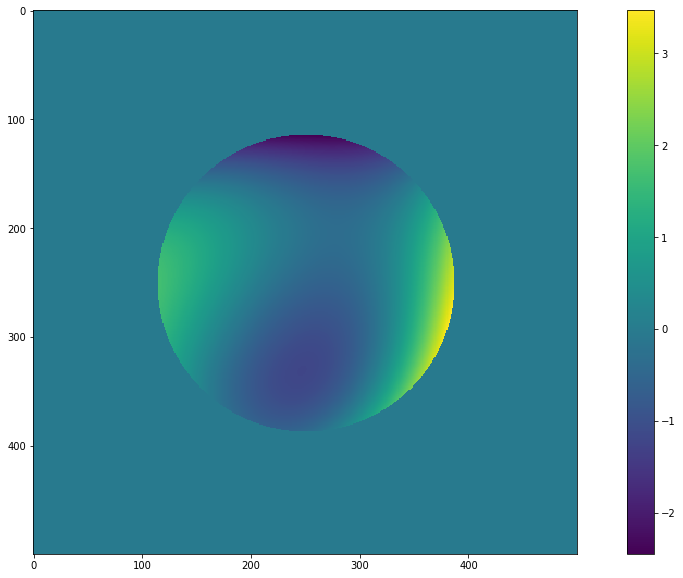

In [47]:
plt.figure(figsize=(18,10))
plt.imshow(sim_phase)
plt.colorbar()

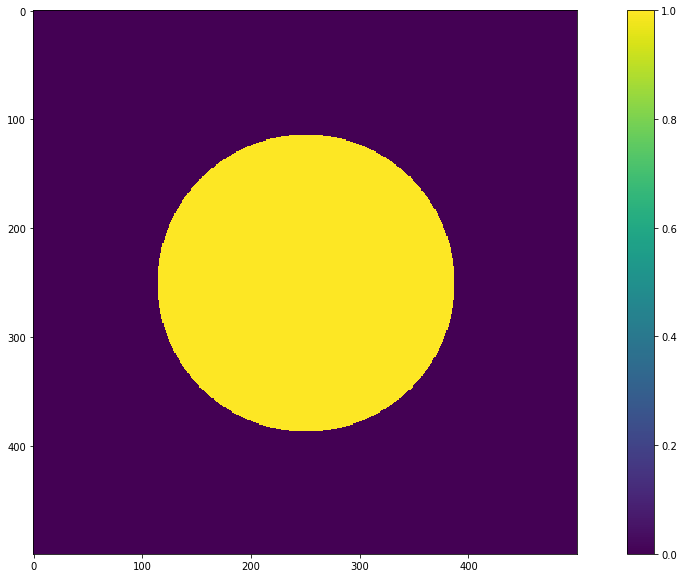

In [48]:
plt.figure(figsize=(18,10))
plt.imshow(Mask)
plt.colorbar()

In [49]:
pupil_com = complex_pupil(sim_phase,Mask)

In [50]:
psf = PSF(pupil_com)

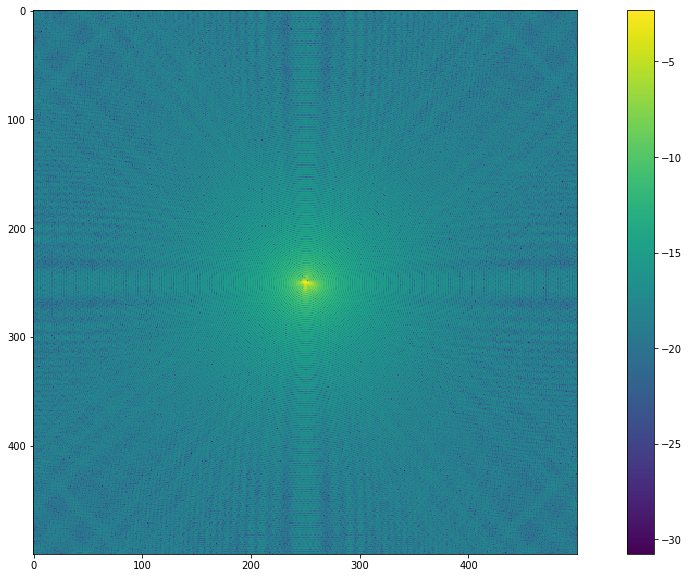

In [53]:
plt.figure(figsize=(18,10))
plt.imshow(np.log(np.abs(psf)))
plt.colorbar()

In [54]:
otf = OTF(psf)
mtf = MTF(otf)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


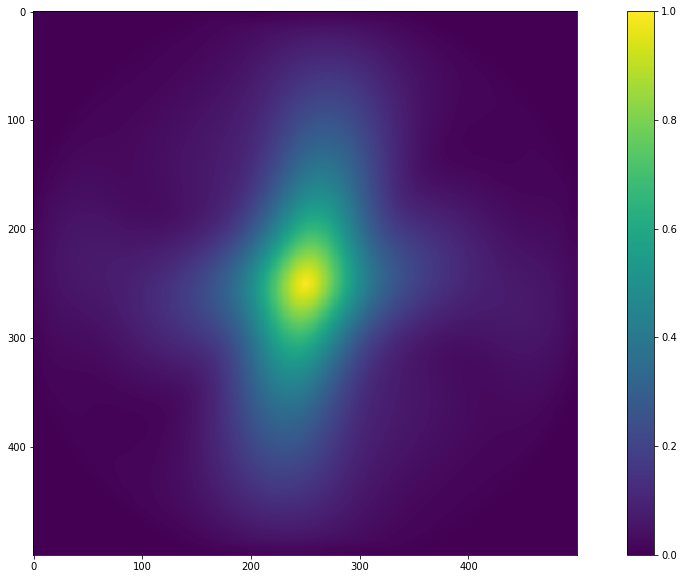

In [56]:
plt.figure(figsize=(18,10))
plt.imshow(fftshift(mtf))
plt.colorbar()

## This is how the MTF of the optical system with the introduced aberrations look like.